✅ Objective:

To examine how employees are distributed geographically across different LocationCode and Region, with breakdowns by GenderCode, RaceDesc, and JobFamily. This supports diversity tracking, regional staffing strategies, and location-based resource planning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\cleaned3.csv"
df = pd.read_csv(file_path)

# Optional cleanup
df['Region'] = df['Region'].fillna('Unknown')
df['LocationCode'] = df['LocationCode'].fillna('Unknown')


Employee Count by Region

C:\Users\alanm\AppData\Local\Temp\ipykernel_26532\1752073194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='Paired')


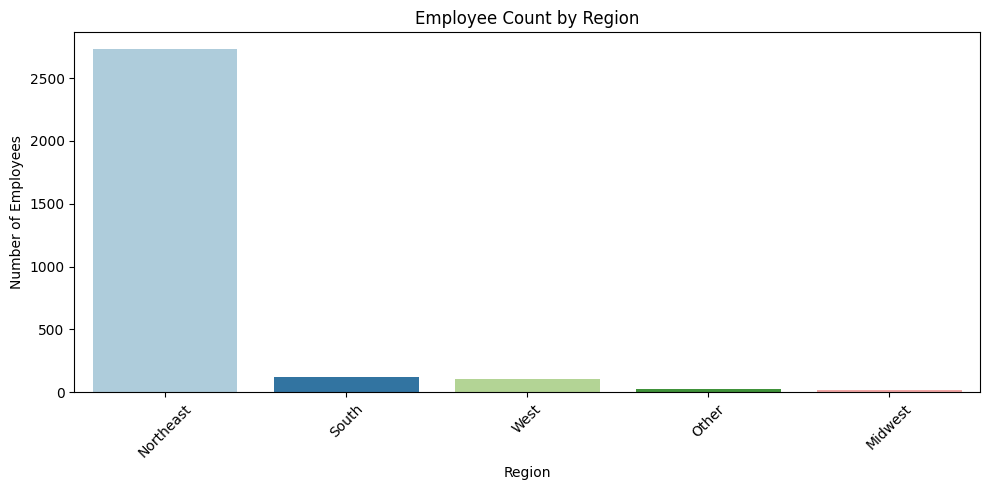

In [3]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='Paired')
plt.title("Employee Count by Region")
plt.ylabel("Number of Employees")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Employee Count by LocationCode

C:\Users\alanm\AppData\Local\Temp\ipykernel_26532\1182025805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='Greens_d')


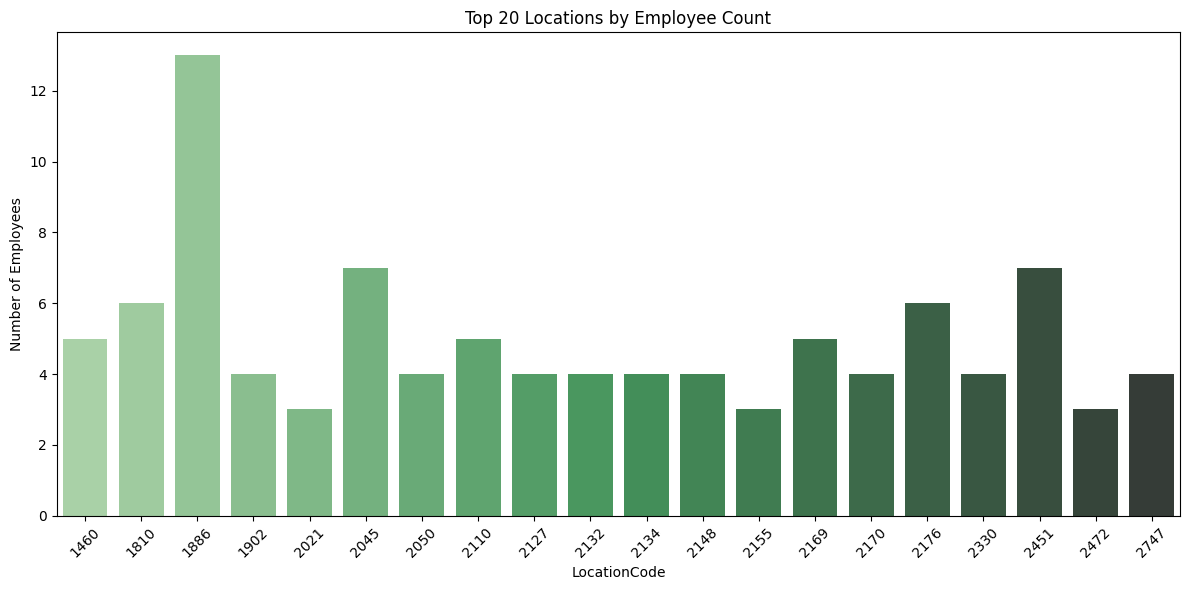

In [4]:
location_counts = df['LocationCode'].value_counts().head(20)  # Show top 20 locations

plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='Greens_d')
plt.title("Top 20 Locations by Employee Count")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


JobFamily Distribution by Region

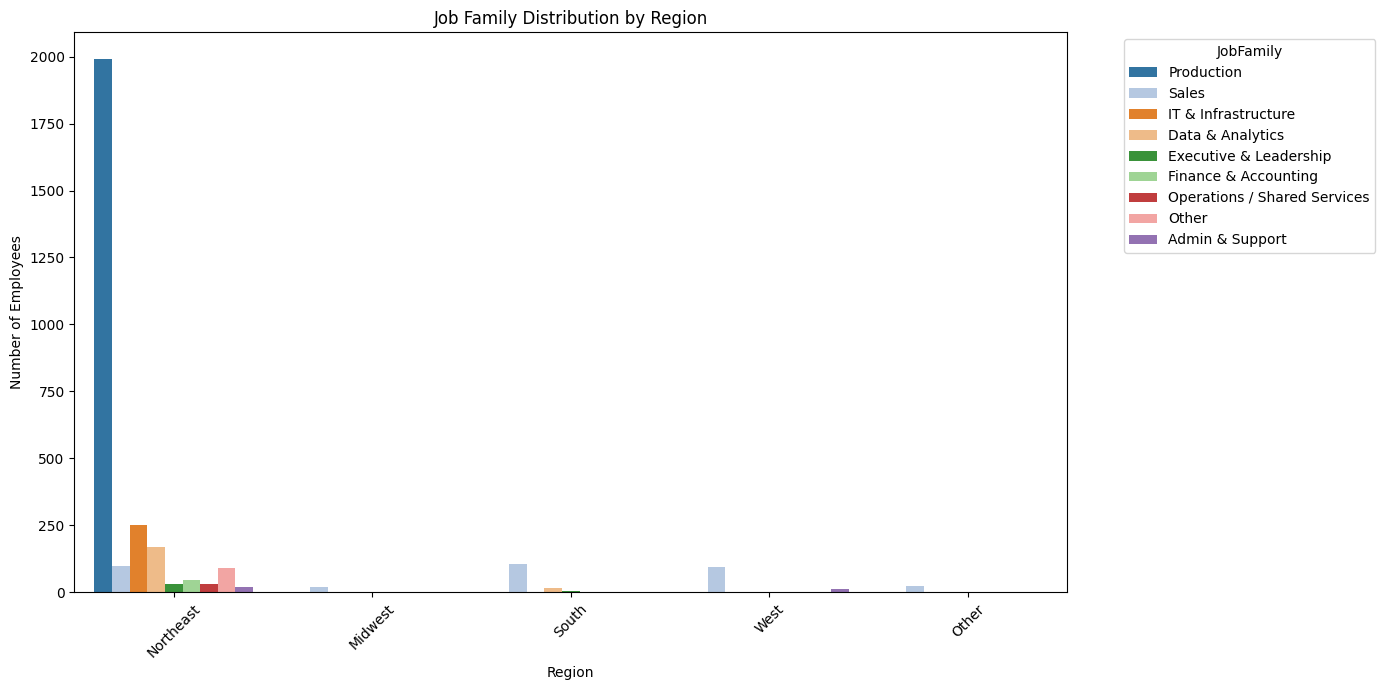

In [5]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Region', hue='JobFamily', palette='tab20')
plt.title("Job Family Distribution by Region")
plt.xticks(rotation=45)
plt.ylabel("Number of Employees")
plt.legend(title='JobFamily', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Gender Distribution Across Regions

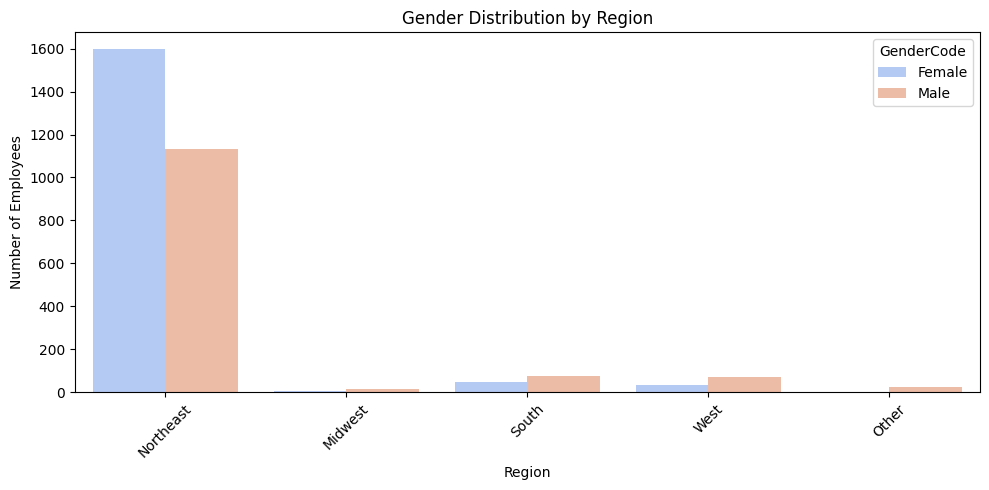

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Region', hue='GenderCode', palette='coolwarm')
plt.title("Gender Distribution by Region")
plt.ylabel("Number of Employees")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Race Distribution Across Locations

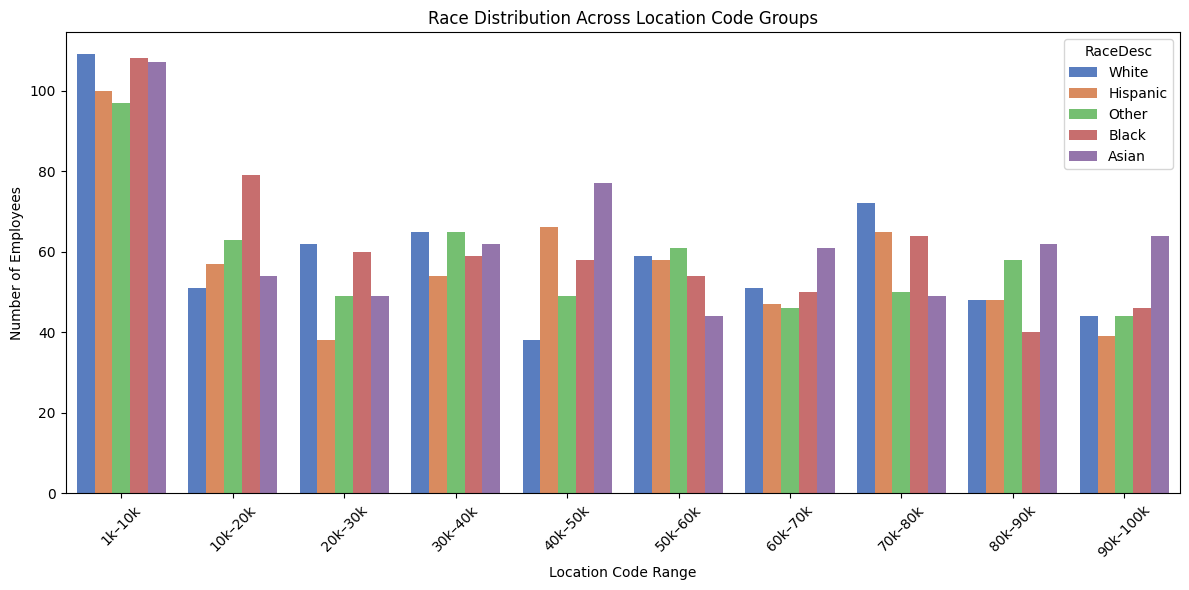

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure LocationCode is numeric
df['LocationCode'] = pd.to_numeric(df['LocationCode'], errors='coerce')

# Define bins (you can adjust the range granularity here)
bins = [1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
labels = ['1k–10k', '10k–20k', '20k–30k', '30k–40k', '40k–50k',
          '50k–60k', '60k–70k', '70k–80k', '80k–90k', '90k–100k']

# Create a new column for grouped location bands
df['LocationGroup'] = pd.cut(df['LocationCode'], bins=bins, labels=labels, include_lowest=True)

# Drop NaNs from groupings (if any LocationCodes were outside bins)
grouped_df = df.dropna(subset=['LocationGroup'])

# Plot race distribution by location group
plt.figure(figsize=(12, 6))
sns.countplot(data=grouped_df, x='LocationGroup', hue='RaceDesc', palette='muted')
plt.title("Race Distribution Across Location Code Groups")
plt.xlabel("Location Code Range")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Optional: Export Summary Table

In [ ]:
# Location-wise summary table (top 20)
summary_table = df.groupby('LocationCode').agg({
    'EmpID': 'count',
    'GenderCode': pd.Series.nunique,
    'RaceDesc': pd.Series.nunique,
    'JobFamily': pd.Series.nunique
}).rename(columns={
    'EmpID': 'TotalEmployees',
    'GenderCode': 'UniqueGenders',
    'RaceDesc': 'UniqueRaces',
    'JobFamily': 'UniqueJobFamilies'
}).sort_values(by='TotalEmployees', ascending=False).head(20)

print(summary_table)

# Save if needed
# summary_table.to_csv("Location_Distribution_Summary.csv")


              TotalEmployees  UniqueGenders  UniqueRaces  UniqueJobFamilies
LocationCode                                                               
1886                      13              2            5                  4
2451                       7              2            3                  2
2045                       7              1            4                  3
1810                       6              2            4                  2
2176                       6              2            3                  2
1460                       5              2            3                  4
2110                       5              2            3                  3
2169                       5              1            4                  2
2330                       4              2            4                  3
1902                       4              1            3                  2
2170                       4              2            3                  3
2148        

📈 What We’re Analyzing and Why

| Feature                  | Purpose                                                       |
| ------------------------ | ------------------------------------------------------------- |
| **Region, LocationCode** | To segment and visualize geographic workforce spread          |
| **RaceDesc, GenderCode** | To measure diversity across regions                           |
| **JobFamily**            | To understand the distribution of roles/functions by location |


🧠 Why This Analysis Is Important:

| Business Purpose                   | Description                                                                 |
| ---------------------------------- | --------------------------------------------------------------------------- |
| **Location Strategy**              | Helps identify which locations require hiring, support, or restructuring    |
| **Diversity Monitoring**           | Tracks regional representation of racial and gender groups                  |
| **Role Concentration**             | Highlights where job families are concentrated for better resource planning |
| **Inclusive Workforce Planning**   | Informs equitable policies across locations                                 |
| **Remote Work Policy Development** | Guides decisions around flexible work based on geography                    |


📊 What We Analyzed and Why:

| Attribute             | Purpose                                                        |
| --------------------- | -------------------------------------------------------------- |
| **LocationCode**      | To understand geographic clustering of employees               |
| **RaceDesc**          | To evaluate racial diversity distribution by region            |
| **GenderCode**        | To track gender balance by location                            |
| **JobFamily**         | To identify functional roles distributed across locations      |
| **Region (optional)** | For broader geographic analysis, beyond specific LocationCodes |


🧪 Techniques Used:

- Converted LocationCode into numeric type to enable range-based grouping

- Grouped codes into interpretable bins (e.g., 1k–10k, 10k–20k, …)

- Used sns.countplot() to visualize race distribution per location group

- Optionally extended to Region, GenderCode, and JobFamily for deeper insights

🔍 Key Insights:

- The workforce is heavily concentrated in a few key location ranges (e.g., 10k–20k and 90k–100k), suggesting major operational hubs.

- Certain location groups lack racial diversity, highlighting regions where diversity initiatives may be necessary.

- Job families are not evenly distributed; some functions are more region-specific, which may reflect strategic allocation or historical hiring trends.

- The refined location group visualization resolved overcrowding and provided a clearer comparative understanding than raw LocationCode plots.

💼 Business Value of This Analysis:

| Value                                      | Benefit to Organization                                                    |
| ------------------------------------------ | -------------------------------------------------------------------------- |
| **Improves Geographic Equity**             | Helps ensure fair treatment and support across locations                   |
| **Supports Regional HR Planning**          | Informs location-specific training, hiring, and retention strategies       |
| **Informs DEI Initiatives**                | Flags underrepresented regions or demographics for inclusion efforts       |
| **Facilitates Talent Allocation**          | Guides workforce distribution in line with business needs                  |
| **Enables Data-Driven Expansion Planning** | Helps in deciding where to expand or downsize based on workforce footprint |
